In [1]:
pip install fbprophet

In [5]:
pip install yfinance

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=82b77ab7820c75a462ab1f96134ef07fa44376cafbba9e7e324f8fe447479144
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [6]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import math
from math import sqrt
import seaborn as sns
import yfinance as yf
from fbprophet import Prophet
import datetime as dt
import requests
import seaborn as sns 
import matplotlib.dates as mdates
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
def search_stock(ticker):   
    play = yf.Ticker(ticker)
    data = play.history(period='max', auto_adjust=True)
    data=data.drop(columns=['Dividends','Stock Splits'])
    data=data.reset_index()
    data['Date']=pd.to_datetime(data['Date'])


    train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
    plt.figure(figsize=(16,8))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Open Prices')
    plt.plot(data['Date'],data['Open'], 'red', label='Train data')
    plt.plot(test_data['Date'],test_data['Open'], 'blue', label='Test data')
    plt.legend()
    plt.title('Opening price for Goldman Sachs')
    plt.show()

    def shiftLbyn(arr, n=0):
        return arr[n::] + arr[:n:]

    def shiftRbyn(arr, n=0):
        return arr[n:len(arr):] + arr[0:n:]
#print(test_data['Open'].values.tolist())

#print(test_data['Open'].corr(test_data['Open'],method='pearson'))

    test_lag1=shiftLbyn(test_data['Open'].values.tolist(), 1)
    test_lag2=shiftLbyn(test_data['Open'].values.tolist(), 2)
    test_lag3=shiftLbyn(test_data['Open'].values.tolist(), 3)

    df=pd.DataFrame()
    df['data']=test_data['Open'].values.tolist()
    df['test_lag1']=test_lag1
    df['test_lag2']=test_lag2
    df['test_lag3']=test_lag3

    print("Lag 1 correlation: "+str(df['data'].corr(df['test_lag1'])))
    print("Lag 2 correlation: "+str(df['data'].corr(df['test_lag2'])))
    print("Lag 3 correlation: "+str(df['data'].corr(df['test_lag3'])))


##plot correlation with lags
    tr=train_data['Open'].values.tolist()
    dff=pd.DataFrame()
    dff['cor']=np.correlate(tr,tr,mode='full')
    dff['cor']=dff['cor'].apply(lambda x:x/dff['cor'].max())

    plt.stem(dff['cor'][int((len(dff['cor'])+1)/2):])
    plt.xlabel('lags')
    plt.ylabel('Correlation')
    plt.title('Correlation')
    plt.show()

    def kalman():

        start = time.time()

        test_dataa=test_data['Open'].values

        A=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
        const=0
        P_init=[[10**-5,0,0,0],[0,10**-5,0,0],[0,0,10**-5,0],[0,0,0,10**-5]]
        R=[[10**-7,0,0,0],[0,10**-7,0,0],[0,0,10**-7,0],[0,0,0,10**-7]]
        Q=[[10**-7,0,0,0],[0,10**-7,0,0],[0,0,10**-7,0],[0,0,0,10**-7]]
        KF=[]
        update=[]
        KF.append(test_dataa[0])
        KF.append(test_dataa[1])
        KF.append(test_dataa[2])
        KF.append(test_dataa[4])
        for i in range(4,len(test_dataa)-4):
            x_init=[[test_dataa[i-4]],[test_dataa[i-3]],[test_dataa[i-2]],[test_dataa[i-1]]]
    #prediction
    #print(i)
            prediction=np.dot(A,x_init)+const
    #print(x_min[1])
            P_min=np.dot(np.dot(A,P_init),A)+Q
            KF.append(prediction[3].tolist()[0])
    #measurement update
            y_min=prediction[3]
    #print(y_min)
            P_y_min=P_min+R
            K_gain=np.dot(P_min,np.linalg.inv(P_y_min))[3][3]
    #print(K_gain)
            x_init=prediction-K_gain*(y_min-test_dataa[i])
            update.append(x_init)
    #x_init=np.array([])
    #print(x_init)
            P_init=P_min-K_gain*P_min
#print(KF[0:10])   
#print(test_dataa[0:10])
#df['KF']=KF

        mse = mean_squared_error(KF, test_dataa[0:len(test_dataa)-4])
        print('MSE: '+str(mse))
        mae = mean_absolute_error(KF, test_dataa[0:len(test_dataa)-4])
        print('MAE: '+str(mae))
        rmse = math.sqrt(mean_squared_error(KF, test_dataa[0:len(test_dataa)-4]))
        print('RMSE: '+str(rmse))

        end = time.time()

        elapsed = end - start
        print("Time elapsed:" +str(elapsed)+" s")


        plt.plot(test_data['Date'],test_dataa,label='test data')
        plt.plot(test_data['Date'].iloc[0:len(test_data['Date'])-4],KF,'green',label='Kalman filter prediction')
        plt.title('Kalman filter')
        plt.legend()
        plt.show()
    kalman()

--------------------------------------------------------------------

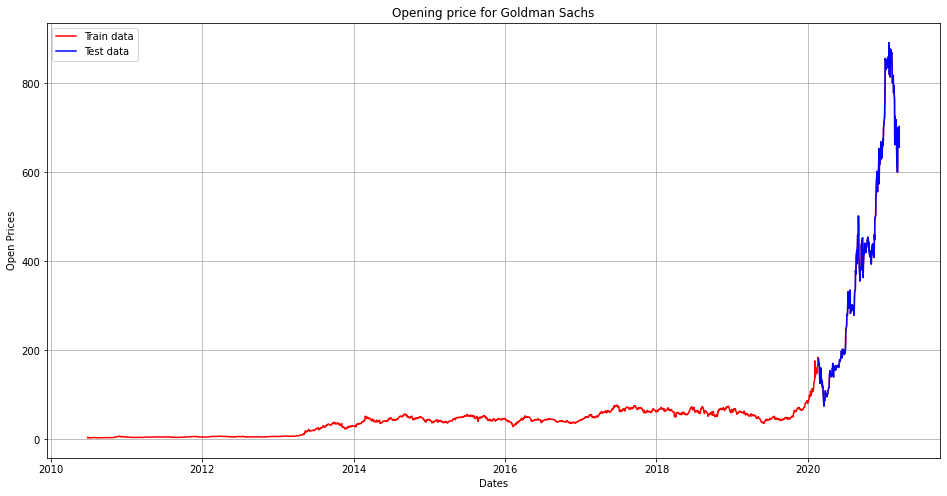

Lag 1 correlation: 0.9883175712981539
Lag 2 correlation: 0.9751773688954006
Lag 3 correlation: 0.9635194555533263


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



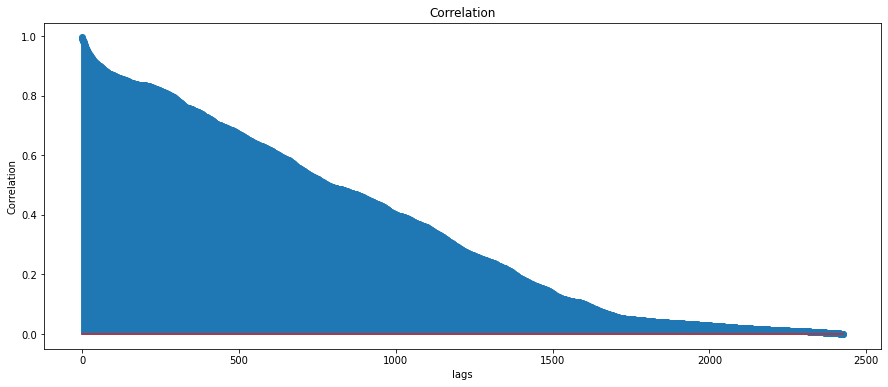

MSE: 465.91057693786547
MAE: 14.635309319747122
RMSE: 21.584961823868614
Time elapsed:0.03956413269042969 s


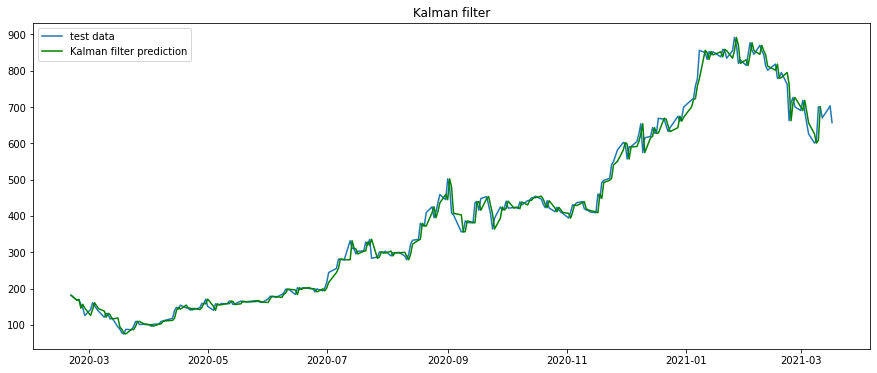

In [8]:
search_stock('TSLA')